In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

**1. Препроцессинг**

1. Загрузите файл из: `datasets/regression.csv`.

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Школа 21/DS_project 13 Введение в машинное обучение/Task 6: Кластеризация/regression.csv')

2. Удалите столбец `pageviews`. Вы будете кластеризировать пользователей только по двум признакам: количеству коммитов и их средней разнице.

In [4]:
df.drop(columns=['pageviews', 'uid'], inplace=True)
df

,num_commits,AVG(diff)
0,62,-64.400000
1,20,-74.800000
2,61,-159.000000
3,51,-61.600000
4,5,-5.666667
5,118,-98.750000
6,65,-95.500000
7,79,-92.600000
8,60,-86.400000
9,18,-105.400000


In [5]:
X = df[['num_commits','AVG(diff)']].values
X

array([[  62.        ,  -64.4       ],
       [  20.        ,  -74.8       ],
       [  61.        , -159.        ],
       [  51.        ,  -61.6       ],
       [   5.        ,   -5.66666667],
       [ 118.        ,  -98.75      ],
       [  65.        ,  -95.5       ],
       [  79.        ,  -92.6       ],
       [  60.        ,  -86.4       ],
       [  18.        , -105.4       ],
       [  34.        , -145.25      ],
       [   7.        ,   -2.        ],
       [  86.        ,  -89.        ],
       [  52.        ,  -48.5       ],
       [  23.        ,  -17.5       ],
       [  41.        ,  -39.33333333],
       [  46.        , -137.2       ],
       [  57.        ,  -27.        ],
       [   5.        , -141.4       ],
       [   6.        ,  -84.        ],
       [  37.        , -223.6       ],
       [  36.        ,  -52.33333333],
       [  27.        ,   -5.33333333],
       [  51.        , -157.4       ],
       [ 128.        , -104.75      ],
       [  40.        , -1

**2. KMeans**

1. Изучите документацию о том, как работает этот алгоритм.
2. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `random_state=21` и `n_clusters=3`.

In [6]:
OMP_NUM_THREADS = 1

In [7]:
kmeans = KMeans(n_clusters=3, random_state=21).fit(df)

3. Визуализируйте полученные данные и кластеры, используя `scatter plot`.

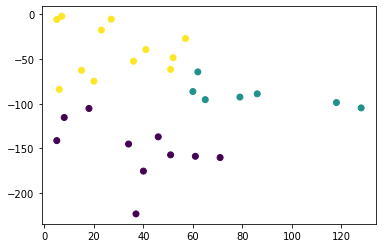

In [8]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)

In [9]:
silhouette_score(df, kmeans.labels_)

0.43901709571532954

4. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.

5. Посчитайте `silhouette_score` для них (изучите документацию по этой метрике).

0.41787451607810133

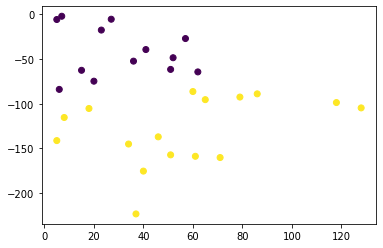

In [10]:
kmeans = KMeans(n_clusters=2, random_state=21).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)

silhouette_score(df, kmeans.labels_)

0.4396571916717123

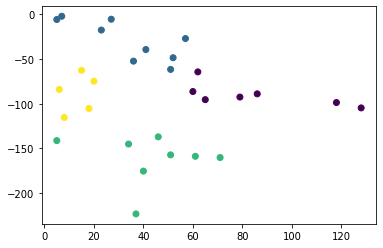

In [11]:
kmeans = KMeans(n_clusters=4, random_state=21).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)

silhouette_score(df, kmeans.labels_)

0.44641001650786977

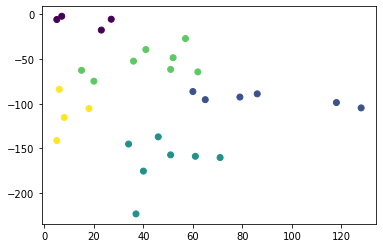

In [12]:
kmeans = KMeans(n_clusters=5, random_state=21).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=kmeans.labels_)

silhouette_score(df, kmeans.labels_)

**3. DBSCAN**

1. Изучите документацию о том, как работает этот алгоритм.
2. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `eps=20` и `min_samples=2`.

In [13]:
clustering = DBSCAN(eps=20, min_samples=2).fit(df)
clustering.labels_

array([ 0,  1,  2,  0,  3,  4,  5,  5,  5,  6,  7,  3,  5,  0,  8,  0,  7,
       -1, -1,  1, -1,  0,  8,  2,  4, -1,  1,  6,  2])

In [14]:
len(np.unique(clustering.labels_))

10

3. Визуализируйте полученные данные и кластеры, используя `scatter plot`.

0.38339641455696616

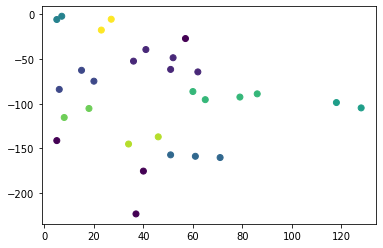

In [15]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)

silhouette_score(df, clustering.labels_)

4. Попробуйте разные значения `eps` и `min_samples` и посмотрите, как изменится ваш график.
5. Посчитайте `silhouette_score` для них.

0.046677004430482796

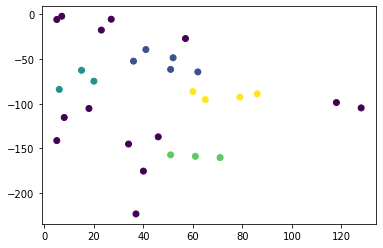

In [16]:
clustering = DBSCAN(eps=20, min_samples=3).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)

silhouette_score(df, clustering.labels_)

0.3659855186711519

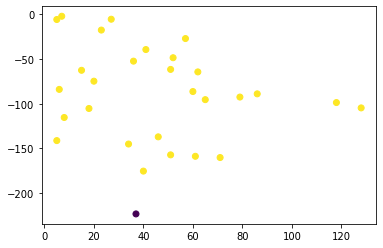

In [17]:
clustering = DBSCAN(eps=40, min_samples=3).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)

silhouette_score(df, clustering.labels_)

0.19881722125199422

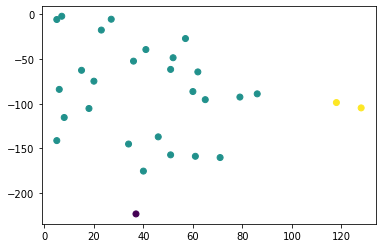

In [18]:
clustering = DBSCAN(eps=30, min_samples=2).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)

silhouette_score(df, clustering.labels_)

-0.07923479818777455

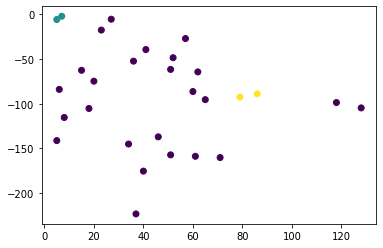

In [19]:
clustering = DBSCAN(eps=10, min_samples=2).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=clustering.labels_)

silhouette_score(df, clustering.labels_)

**4. Иерархическая кластеризация (AgglomerativeClustering)**

1. Воспользуйтесь этим алгоритмом, чтобы создать кластера, используя параметры `n_clusters=5`.

In [20]:
hierarchical = AgglomerativeClustering(n_clusters=5).fit(df)

In [21]:
hierarchical.labels_

array([2, 3, 0, 2, 4, 1, 1, 1, 1, 3, 0, 4, 1, 2, 4, 2, 0, 2, 3, 3, 0, 2,
       4, 0, 1, 0, 3, 3, 0])

2. Визуализируйте полученные данные и кластеры, используя `scatter plot`.

0.46383015199381467

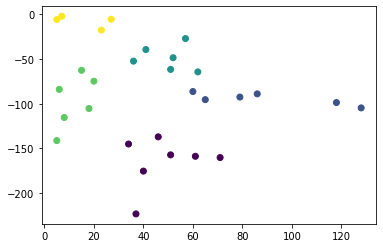

In [22]:
plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)

silhouette_score(df, hierarchical.labels_)

3. Попробуйте разные значения `n_clusters` и посмотрите, как изменится ваш график.
4. Посчитайте `silhouette_score` для них.

0.3390493703444805

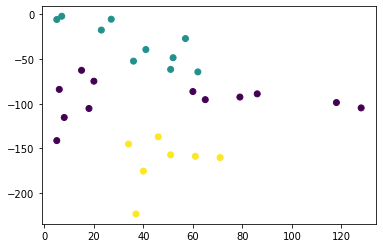

In [23]:
hierarchical = AgglomerativeClustering(n_clusters=3).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)

silhouette_score(df, hierarchical.labels_)

0.35902490572221984

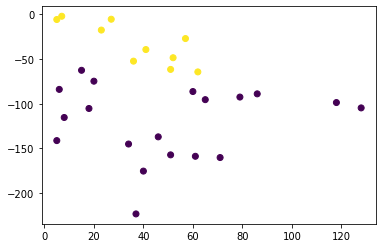

In [24]:
hierarchical = AgglomerativeClustering(n_clusters=2).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)

silhouette_score(df, hierarchical.labels_)

0.4448362750283643

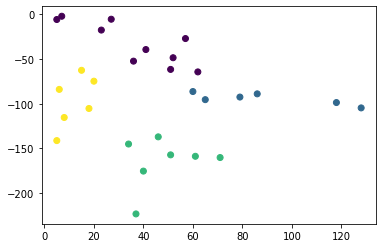

In [25]:
hierarchical = AgglomerativeClustering(n_clusters=4).fit(df)

plt.scatter(df.num_commits, df['AVG(diff)'], c=hierarchical.labels_)

silhouette_score(df, hierarchical.labels_)

5. Визуализируйте дендрограмму (`dendrogram`).

In [26]:
dendr = linkage(df, method='ward')

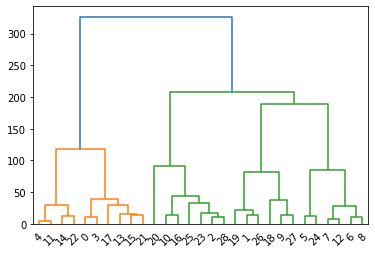

In [27]:
dendrogram(dendr);

In [28]:
hierarchical = AgglomerativeClustering(distance_threshold=0, n_clusters=None).fit(df)

df['cluster'] = hierarchical.labels_
df

,num_commits,AVG(diff),cluster
0,62,-64.400000,24
1,20,-74.800000,21
2,61,-159.000000,26
3,51,-61.600000,16
4,5,-5.666667,28
5,118,-98.750000,23
6,65,-95.500000,25
7,79,-92.600000,27
8,60,-86.400000,15
9,18,-105.400000,19


_Другой способ_

In [29]:
def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack(
        [model.children_, model.distances_, counts]
    ).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)


Text(0.5, 0, 'Number of points in node (or index of point if no parenthesis).')

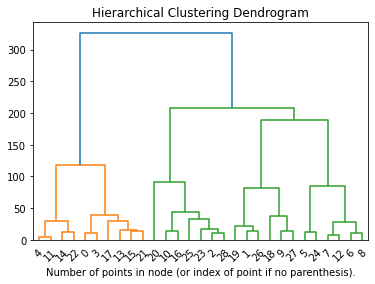

In [30]:
plt.title("Hierarchical Clustering Dendrogram")
# plot the top three levels of the dendrogram
plot_dendrogram(hierarchical, truncate_mode="level", p=6)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")

**5. Функция**

Напишите функцию, которая:
1. Принимает в качестве аргументов: класс модели кластеризации, его параметры, название параметра для оптимизации, интервал значений для перебора вариантов и датасет.
2. Пробует различные значения из этого интервала для заданного параметра и рассчитывает `silhouette_score` для каждого нового значения.
3. Определяет лучшее значение параметра из интервала с точки зрения этой метрики.
4. Возвращает два графика:
    - первый показывает, как `silhouette_score` менялся в зависимости от изменения параметра,
    - второй показывает данные и кластера на `scatter plot` для наилучшего значения из интервала.

In [31]:
def optimize(model_class, params, param_to_optimize, param_range, df):
    silhouettes = []
    for val in param_range:
        params[param_to_optimize] = val
        regr = model_class(**params)
        regr.fit(df)
        labs = regr.labels_
        if len(set(labs)) < 2: # silhouette_score requires at least two clusters
            new_val = 0
        else:
            new_val = silhouette_score(df, labs)
        silhouettes.append(new_val)
    best_idx = silhouettes.index(max(silhouettes))
    params[param_to_optimize] = param_range[best_idx]
    regr = model_class(**params)
    regr.fit(df)
    labs = regr.labels_
    fig, (ax1, ax2) = plt.subplots(1, 2)
    ax1.plot(param_range, silhouettes, 'bo-')
    ax2.scatter(df.num_commits, df['AVG(diff)'], c=regr.labels_)
    fig.set_figheight(8)
    fig.set_figwidth(17)
    ax1.title.set_text('silhouette_score')
    ax2.title.set_text('Scatter plot for the best {} = {}'.format(param_to_optimize, param_range[best_idx]))    
    ax1.xaxis.grid()


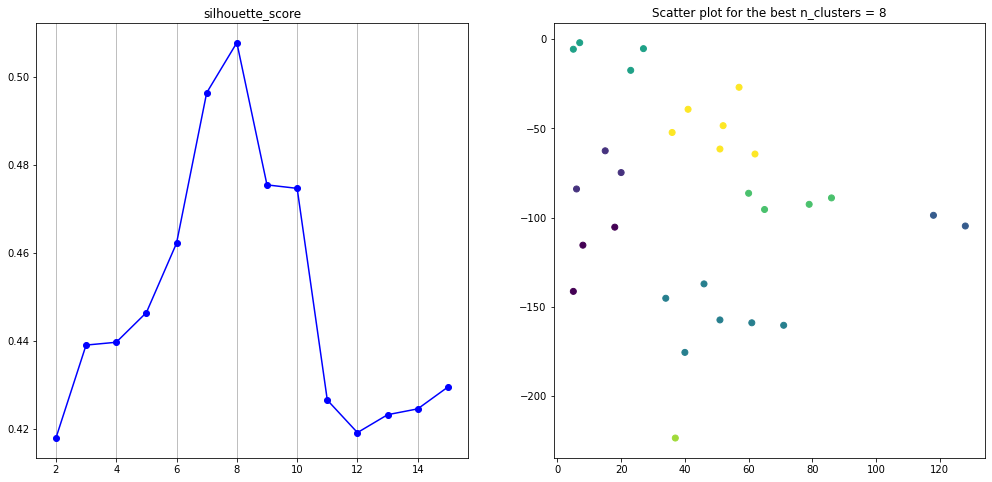

In [32]:
params = {'random_state': 21}
optimize(KMeans, params, 'n_clusters', list(range(2, 16)), df[['num_commits','AVG(diff)']])

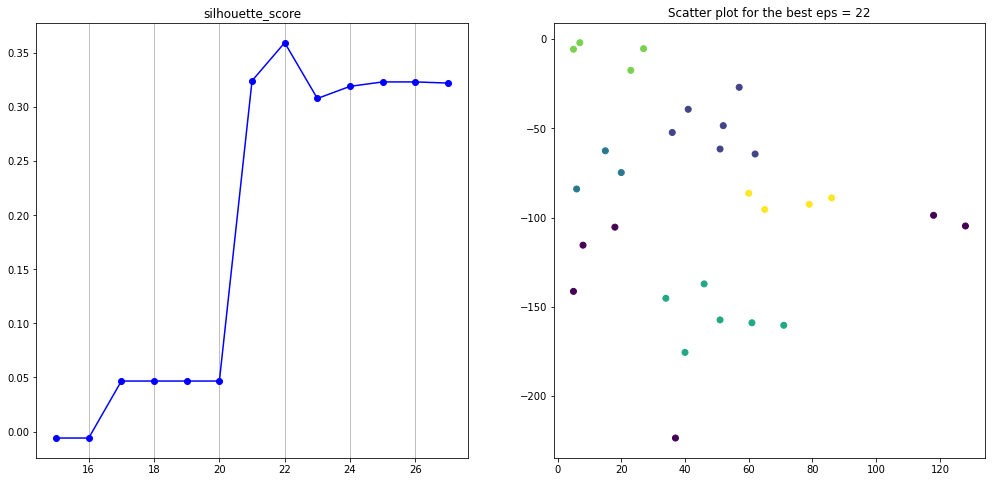

In [33]:
params = {'min_samples': 3}
optimize(DBSCAN, params, 'eps', list(range(15, 28)), df[['num_commits','AVG(diff)']])

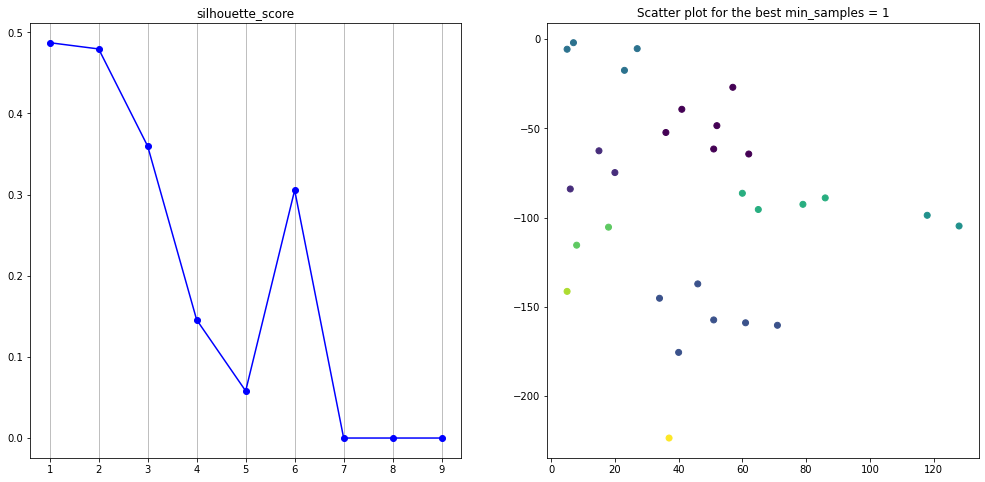

In [35]:
params = {'eps': 22}
optimize(DBSCAN, params, 'min_samples', list(range(1, 10)), df[['num_commits','AVG(diff)']])

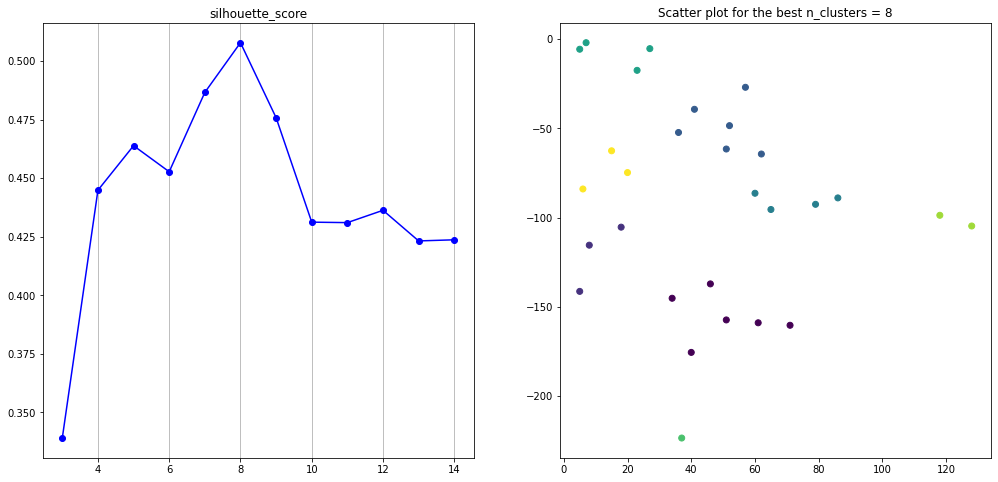

In [36]:
params = {}
optimize(AgglomerativeClustering, params, 'n_clusters', list(range(3, 15)), df[['num_commits','AVG(diff)']])